# Quick Start Guide

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## A simple example

In [ ]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

## Parts of a Figure

### Figure

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots()
fig, ax = plt.subplots(2, 2)
fig, ax = plt.subplot_mosaic(
    [
        ["left", "right_top"],
        ["left", "right_bottom"],
    ]
)

### Axes

An Axes is a part of a figure that contains the data. It is the area where the data is plotted. A figure can have multiple axes, and each axis can have its own set of data. Each axes can have its own title, labels, and other properties. The axes are the coordinate system in which the data is plotted. The axes are created using the `add_axes` method of the figure object.

### Axis

Axis sets the scale of the data. It is the part of the axes that contains the ticks and labels. The axis is created using the `add_axis` method of the axes object. The axis can be set to a specific scale, such as linear or logarithmic, using the `set_xscale` and `set_yscale` methods of the axes object. The axis can also be set to a specific range using the `set_xlim` and `set_ylim` methods of the axes object.

### Artist

Basically, an artist is anything that can be drawn on the figure. This includes lines, text, and shapes. Artists are created using the `add_artist` method of the axes object. Artists can be customized using various methods, such as `set_color`, `set_linewidth`, and `set_fontsize`. Artists can also be added to the figure using the `add_artist` method of the figure object.

### Types of inputs to plotting functions

Plotting functions expect numpy.array-like objects as inputs. This includes lists, tuples, and numpy arrays. The inputs can be 1D or 2D arrays. The inputs can also be masked arrays, which are arrays that have missing values. The inputs can also be pandas dataframes, which are 2D arrays with labeled axes. The inputs can also be xarray dataarrays, which are n-dimensional arrays with labeled axes. The inputs can also be dask arrays, which are large arrays that are split into smaller chunks for parallel processing.

In [ ]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
b_asarray

In [ ]:
np.random.seed(19680801)
data = {'a': np.random.randn(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] =data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize = (5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel("entry a")
ax.set_ylabel("entry b")
ax.set_title("Scatter plot with varying marker size and color")


## Coding styles

### The explicit and the implicit interfaces

There are essentially two ways to use matplotlib. The first is the explicit interface, which is the most common way to use matplotlib. The explicit interface is the most flexible and powerful way to use matplotlib. The explicit interface allows you to create complex figures with multiple axes and artists. The explicit interface also allows you to customize the figure and axes in great detail.

In [ ]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')
ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.set_title("Simple plot with legend")
ax.legend()

In [ ]:
x = np.linspace(0, 2, 100)

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel("x label")
plt.ylabel("y label")
plt.title("Simple plot with legend")
plt.legend()

### Making helper functions

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out

In [ ]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'color': 'blue', 'marker': 'x'})
my_plotter(ax2, data3, data4, {'color': 'red', 'marker': 'o'})


## Styling Artists

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
x = np.arange(len(data1))
ax.plot(
    x, np.cumsum(data1),
    color='blue',
    linewidth=3,
    linestyle='--'
)
l, = ax.plot(
    x, np.cumsum(data2),
    color='orange',
    linewidth=3
)
l.set_linestyle(':')

### Colors

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter(data1, data2, s = 50, color='C0', edgecolors='k')

### Linewidths, linestyles, and markersizes

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.set_title("Different markers")
ax.legend()

## Labelling plots
### Axes labels and text

In [ ]:
mu, sigma = 115, 15
x = np.random.normal(mu, sigma, 10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]', fontsize=10, color='red')
ax.set_ylabel('Probability', fontsize=10, color='red')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)',
              fontdict={'fontsize': 14, 'color': 'green'})
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

### Using matematical expressions in text

In [ ]:
ax.set_title(r'$\mu=115,\ \sigma=15$', fontsize=10, color='red')

### Annotations

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line,  = ax.plot(t, s, lw=2, color='C0')
ax.set_xlabel('time (s)', fontsize=10, color='red')

ax.annotate('local max',
            xy=(2, 1), xycoords='data',
            xytext=(3, 1.5), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10, color='red')

ax.set_ylim(-2, 2)
ax.set_xlim(0, 5)

### Legends

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.set_title("Different markers")
ax.legend()

## Axis scales and ticks
### Axis scales

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

### Tick locators and formatters

In [ ]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

### Plotting dates and strings

In [ ]:
from matplotlib.dates import ConciseDateFormatter

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

In [ ]:
time_series = pd.DataFrame({'date': dates, 'data': data}).set_index('date')

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(time_series)
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']
data = np.random.rand(len(categories))

bar_data = pd.DataFrame({'categories': categories, 'data': data})

ax.bar(bar_data.categories, bar_data.data, color='lightblue', edgecolor='black')

### Additional Axis objects

In [ ]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')

l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', (np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

### Color mapped data

In [ ]:
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')

pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma', norm=LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

## Working with multiple figures and axes

Text(0.5, 1.0, 'right')

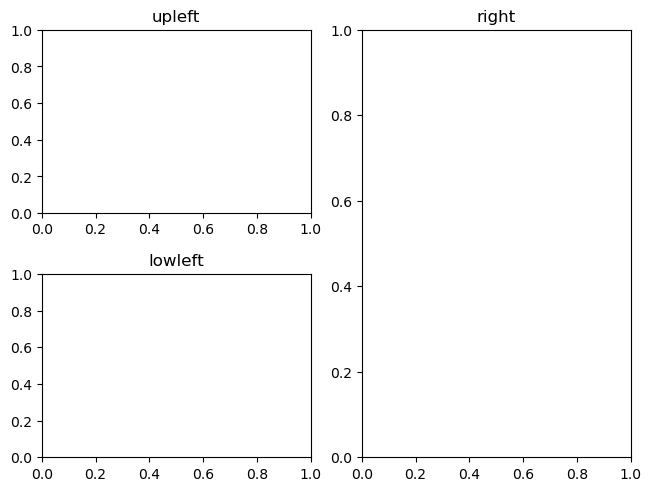

In [83]:
fig, axd = plt.subplot_mosaic(
    [
        ["upleft", "right"],
        ["lowleft", "right"],
    ],
    layout='constrained'
)

axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')